0    8607
5     768
6     735
1     118
3      92
4      69
2      60
Name: label, dtype: int64
(10449, 142)
Epoch 1/60
700/700 [==============================] - 1s 2ms/step - loss: 0.3117 - accuracy: 0.9134
Epoch 2/60
700/700 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9703
Epoch 3/60
700/700 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9774
Epoch 4/60
700/700 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9796
Epoch 5/60
700/700 [==============================] - 1s 2ms/step - loss: 0.0962 - accuracy: 0.9797
Epoch 6/60
700/700 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9797
Epoch 7/60
700/700 [==============================] - 1s 2ms/step - loss: 0.1163 - accuracy: 0.9760
Epoch 8/60
700/700 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9799
Epoch 9/60
700/700 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy

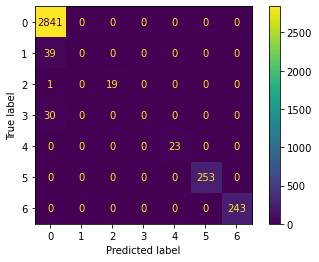

In [160]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from tensorflow.keras.layers import Dropout
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
import seaborn as sns 
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split



d=pd.read_csv("labeled_packets.csv")
d.drop(columns=["Unnamed: 0"],inplace=True)
print(d.label.value_counts())

packets_dum=pd.get_dummies(d, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive','Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])


packets_dum.drop(columns=["iface_ver_3",
"retcode_10",
"ip_src_10.1.0.9",
"mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(142)))
model.add(tf.keras.layers.Dense(85, activation='tanh'))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dense(7,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=60   , batch_size=10)

l=[]
for i in y_test:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 



In [158]:
np.unique(dummy_y)

array([0., 1.], dtype=float32)

In [159]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [106]:
d.columns

Index(['msg_type', 'session_id', 'iface_ver', 'length', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id', 'Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'Client_id', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port', 'label'],
      dtype='object')

In [138]:
d1["proto"]

0        17
1        17
2        17
3        17
4        17
         ..
10444    17
10445    17
10446    17
10447    17
10448    17
Name: proto, Length: 10449, dtype: int64

In [131]:
X.shape

(10449, 96)

(10449, 96)
Epoch 1/30
700/700 [==============================] - 2s 3ms/step - loss: 0.3403 - accuracy: 0.9219 - val_loss: 0.2001 - val_accuracy: 0.9643
Epoch 2/30
700/700 [==============================] - 2s 2ms/step - loss: 0.1612 - accuracy: 0.9687 - val_loss: 0.1247 - val_accuracy: 0.9754
Epoch 3/30
700/700 [==============================] - 2s 3ms/step - loss: 0.1195 - accuracy: 0.9759 - val_loss: 0.1166 - val_accuracy: 0.9777
Epoch 4/30
700/700 [==============================] - 2s 2ms/step - loss: 0.1100 - accuracy: 0.9774 - val_loss: 0.1034 - val_accuracy: 0.9777
Epoch 5/30
700/700 [==============================] - 2s 2ms/step - loss: 0.1025 - accuracy: 0.9791 - val_loss: 0.1003 - val_accuracy: 0.9783
Epoch 6/30
700/700 [==============================] - 2s 3ms/step - loss: 0.1025 - accuracy: 0.9791 - val_loss: 0.1095 - val_accuracy: 0.9777
Epoch 7/30
700/700 [==============================] - 2s 3ms/step - loss: 0.0987 - accuracy: 0.9797 - val_loss: 0.0985 - val_accuracy: 0

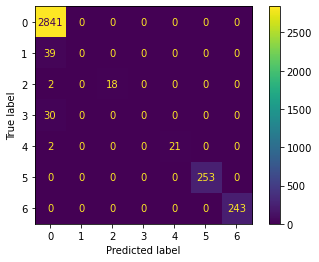

In [142]:
d1=d.drop(columns=['Type', 'timesensitive', 'client_min',
       'client_max', 'client_resendMin', 'client_resendMax', 'errorRate',
       'server_min', 'server_max', 'client_mac', 'client_ip',
       'client_send_port', 'client_rec_port', 'server_mac', 'server_ip',
       'server_send_port', 'server_rec_port'])

packets_dum=pd.get_dummies(d1, columns=[ 'msg_type', 'iface_ver', 'proto_ver', 'retcode',
       'ip_src', 'ip_dst', 'proto', 'sport', 'dport', 'mac_src', 'mac_dst',
       'service_id', 'method_id','Client_id'])


packets_dum.drop(columns=["iface_ver_3",
"retcode_10",
"ip_src_10.1.0.9",
"mac_src_02:9b:bb:bb:bb:bb"],inplace=True)

packets_dum["Label"]=packets_dum["label"]

packets_dum.drop(columns="label",inplace=True)
packets_dum.head()

X=packets_dum.iloc[:,0:-1]
y=packets_dum.iloc[:,-1]

X=X.astype(float)
X=X.to_numpy()
y=y.astype(int)
y=y.to_numpy()

print(X.shape)


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)
dummy_y=np_utils.to_categorical(encoded_y)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42,stratify=y)
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(96,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(7,activation="softmax"))



model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
history=model.fit(X_train, y_train, epochs=30,batch_size=10,validation_data=(X_test,y_test))

l=[]
for i in y_test:
    l.append(np.argmax(i))
k=np.array(l)

# Multiclass
y_pred = model.predict_classes(X_test)
cm=confusion_matrix(k, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
disp.plot() 


In [134]:
d1.corr()

,msg_type,session_id,iface_ver,length,proto_ver,retcode,proto,sport,dport,service_id,method_id,Client_id,label
msg_type,1.000000,0.043960,-0.209444,0.007653,NaN,0.357925,NaN,-0.985604,0.985604,0.036763,-0.141520,-0.017759,-0.283968
session_id,0.043960,1.000000,-0.299315,-0.013242,NaN,-0.007019,NaN,-0.045121,0.045121,-0.137371,0.015502,0.004204,-0.435990
iface_ver,-0.209444,-0.299315,1.000000,-0.013526,NaN,-0.074268,NaN,0.206490,-0.206490,-0.020617,0.028027,-0.033550,0.720743
length,0.007653,-0.013242,-0.013526,1.000000,NaN,0.003531,NaN,-0.006168,0.006168,0.001052,0.008597,0.002656,-0.002488
proto_ver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retcode,0.357925,-0.007019,-0.074268,0.003531,NaN,1.000000,NaN,-0.322201,0.322201,0.080160,-0.042568,0.033028,-0.062927
proto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sport,-0.985604,-0.045121,0.206490,-0.006168,NaN,-0.322201,NaN,1.000000,-1.000000,-0.032146,0.140539,0.020958,0.307195
dport,0.985604,0.045121,-0.206490,0.006168,NaN,0.322201,NaN,-1.000000,1.000000,0.032146,-0.140539,-0.020958,-0.307195
service_id,0.036763,-0.137371,-0.020617,0.001052,NaN,0.080160,NaN,-0.032146,0.032146,1.000000,-0.444265,0.498956,-0.039171


In [133]:
packets_dum

,session_id,length,msg_type_0,msg_type_1,msg_type_2,msg_type_128,msg_type_129,iface_ver_1,proto_ver_1,retcode_0,...,method_id_4095,Client_id_1,Client_id_2,Client_id_3,Client_id_4,Client_id_5,Client_id_6,Client_id_7,Client_id_8,Label
0,1,28,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,23,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,10,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,2,8,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,3,11,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,7,11,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10445,8,21,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10446,8,20,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
10447,9,16,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


# Cross Validation

TRAIN: [    0     2     3 ... 10443 10446 10447] TEST: [    1     9    18 ... 10444 10445 10448]
Epoch 1/8
279/279 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.8686
Epoch 2/8
279/279 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9749
Epoch 3/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9855
Epoch 4/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9909
Epoch 5/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0212 - accuracy: 0.9934
Epoch 6/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9976
Epoch 7/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9998
Epoch 8/8
279/279 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 1.0000
TRAIN: [    0     1     3 ... 10446 10447 10448] TEST: [    2     4     8 ... 10422 10439 10442]
Epoch 1/8
279/

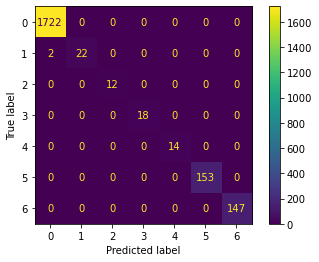

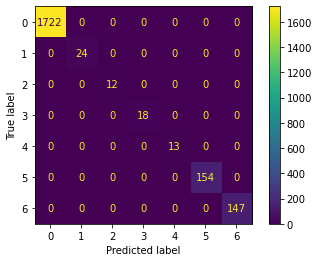

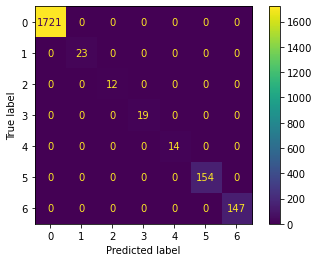

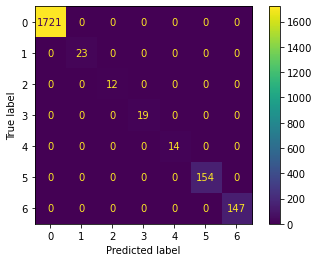

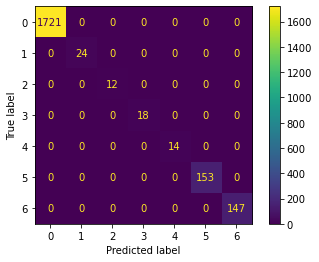

In [85]:
import random as rn


tf.random.set_seed(89)
rn.seed(1254)
np.random.seed(37)


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
k=1
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = dummy_y[train_index], dummy_y[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(142,)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(7,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    history=model.fit(X_train, y_train, epochs=8,batch_size=30)
    
    l=[]
    for i in y_test:
        l.append(np.argmax(i))
    k=np.array(l)

    # Multiclass
    y_pred = model.predict_classes(X_test)
    cm=confusion_matrix(k, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)    
    disp.plot() 
    
    
    

# Plot ROC curves for the multilabel problem

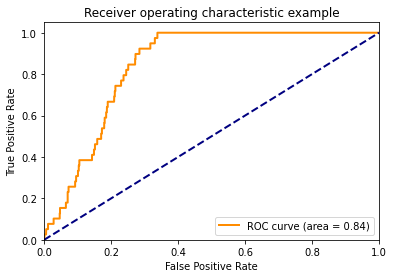

In [149]:
y_score=model.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<ipython-input-161-81281a3972c7>:14: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


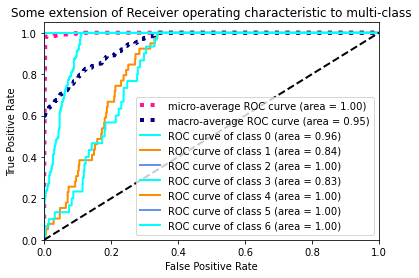

In [161]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 7

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()